In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data CLeaning
# 2. EDA-- Exploratory Data Analysis
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation of Model
# 6. Improvement of Model 
# 7. Website Building and Other
# 8. Deploy in server


 ## Step 1. Data Cleaning of spam Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Dropping last 3 columns as we have only 50 rows at max from which we cannot analyze anything beacuse it is o less data
df.drop(columns=['Unnamed: 4','Unnamed: 3','Unnamed: 2'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
1945,ham,Can Ì_ call me at 10:10 to make sure dat i've ...
1777,spam,Buy Space Invaders 4 a chance 2 win orig Arcad...
4575,spam,Congratulations ur awarded 500 of CD vouchers ...
21,ham,IÛ÷m going to try for 2 months ha ha only joking
1165,ham,"Haha yeah I see that now, be there in a sec"


In [9]:
df.shape

(5572, 2)

In [10]:
# Renaimg a columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(3)

,target,text
1171,spam,Got what it takes 2 take part in the WRC Rally...
1287,ham,"What do you do, my dog ? Must I always wait ti..."
2851,ham,how tall are you princess?


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
# Changes ham to 0 and spam to 1
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [14]:
# Checking Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# Checking for Duplicate Values
df.duplicated().sum()

403

In [16]:
# Removing Duplicate
df = df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

In [18]:
print(f"Duplicate Value is: {df.duplicated().sum()}")
print(f"Number of Null Value Value is: {df.isnull().sum()}")

Duplicate Value is: 0
Number of Null Value Value is: target    0
text      0
dtype: int64


# Step 2: Exploratory Data Analysis (EDA) 

In [20]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21088a1c7d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

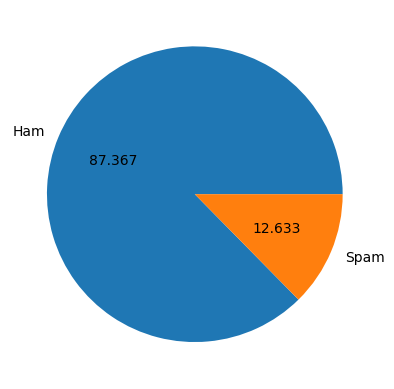

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct="%.3f")

In [24]:
# Data is imbalanced .i.e. we have around 80% Ham and 13 % Spam

In [30]:
 # !pip install nltlk

In [25]:
import nltk

In [31]:
# nltk.download('punkt')

In [32]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [33]:
df['num_characters'] = df['text'].apply(len)

In [34]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
# Fetching Number of words

In [40]:
# Tokenize each text in the 'text' column of the dataframe using nltk.word_tokenize
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [41]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
df['num_sentences']=  df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [47]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [63]:
# df[df['target'] == 0 ][['num_characters','num_words','num_sentences']].describe()

In [64]:
# df[df['target'] == 1 ][['num_characters','num_words','num_sentences']].describe()

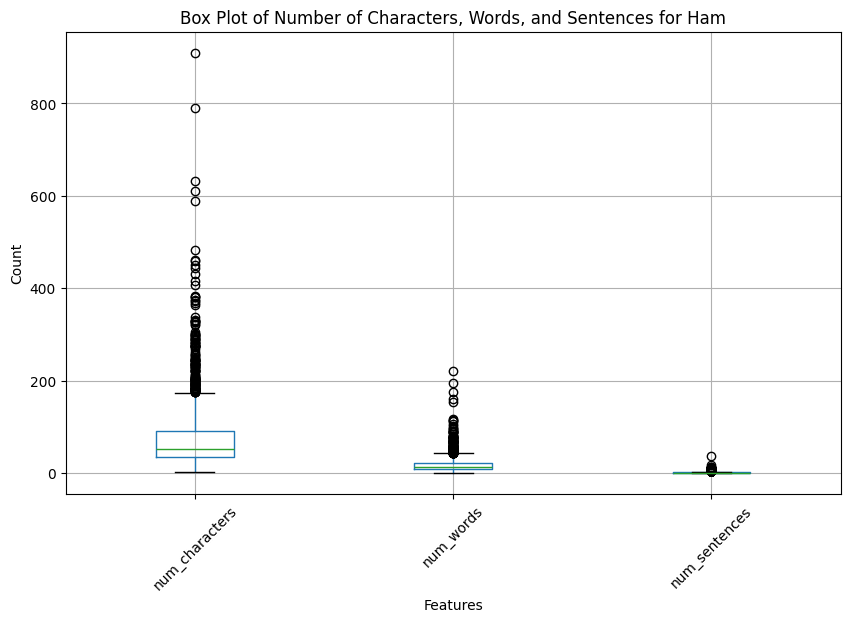

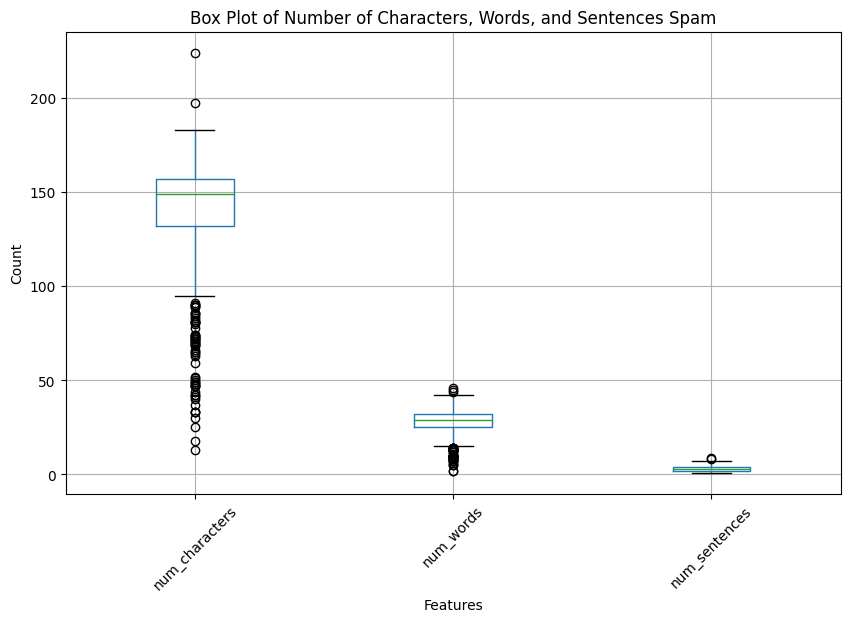

Summary statistics for target value of 0(Ham):
       num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

Summary statistics for target value of 1(Spam):
       num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000


In [66]:
# EDA for target value of 0
df_target_0 = df[df['target'] == 0]
summary_stats_target_0 = df_target_0[['num_characters', 'num_words', 'num_sentences']].describe()

# Box plot for target value of 0
plt.figure(figsize=(10, 6))
df_target_0[['num_characters', 'num_words', 'num_sentences']].boxplot()
plt.title('Box Plot of Number of Characters, Words, and Sentences for Ham')
plt.ylabel('Count')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# EDA for target value of 1
df_target_1 = df[df['target'] == 1]
summary_stats_target_1 = df_target_1[['num_characters', 'num_words', 'num_sentences']].describe()

# Box plot for target value of 1
plt.figure(figsize=(10, 6))
df_target_1[['num_characters', 'num_words', 'num_sentences']].boxplot()
plt.title('Box Plot of Number of Characters, Words, and Sentences Spam')
plt.ylabel('Count')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("Summary statistics for target value of 0(Ham):")
print(summary_stats_target_0)

print("\nSummary statistics for target value of 1(Spam):")
print(summary_stats_target_1)
